In [1]:
'''
Test code for algorithm of Cai et. al
'''
import math
import operator
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
from Code.pr_Modified_networkx_lib import pagerank_scipy as pagerankModified
from networkx import pagerank_scipy as pagerank_scipy
import Code.utilities as my_utilities
import time

In [2]:

# Reads data to G graph. Change gml to read other things
G = nx.read_gml("../Data/footballTSEweb/footballTSEinput.gml")
vect = [str(x) for x in range(50)]

# Generating a copy of G graph. May be redundant.
G2 = G
pos = nx.spring_layout(G2) # Layout

## Calls page rank for graph without personalization
pr = pagerankModified(G2)
##
threshold = 0.6 # Threshold for graph coloring
prList = list(pr.values()) # This stores dict values as a list (Hope so)
#print(prList)
# Colormap is a list of RGB A values. Will be used to color the graph depending on the PR value.
# A (alpha does not work ??)
colormap = [(0,1 - (prList[x] * 100)**3,1, (prList[x] * 100)) for x in range(len(pr))]


/home/egebasturk/anaconda3/envs/PageRank/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


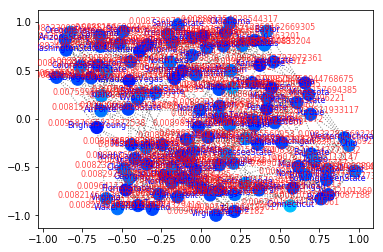

In [3]:

# Following draws graph nodes, labels and edges separately
nx.draw_networkx_nodes(G2, pos=pos, node_size=150, node_color=colormap)
# Pos_higher and related calculations are used to draw PR values above nodes.
pos_higher = {}
y_off = 0.02  # offset on the y axis

for k, v in pos.items():
    pos_higher[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G2, pos=pos_higher, font_size=8, font_color='b')
nx.draw_networkx_edges(G2, pos=pos, style='dotted', alpha=0.5)
pos_higher2 = {}

for k, v in pos.items():
    pos_higher2[k] = (v[0], v[1]+y_off*2)
nx.draw_networkx_labels(G2, pos=pos_higher2, alpha=0.7, font_color='r', labels=pr, font_size=8)
plt.show() # display subgraph


In [157]:

## Test code to run pagerank on each node with personalization
## Dummy
prS = []
counter = 0
for i in G2.nodes():
    prS.append(pagerank_scipy(G2, personalization={i:1}))
    # Comment in to see the max for each personalization
    #print(i + ":\t\t"+ max(prS[counter].items(), key=operator.itemgetter(1))[0])
    counter += 1
## Dummy

prS = []
counter = 0

start_time_of_standard_PR = time.clock()
for i in G2.nodes():
    prS.append(pagerank_scipy(G2, personalization={i:1}))
    # Comment in to see the max for each personalization
    #print(i + ":\t\t"+ max(prS[counter].items(), key=operator.itemgetter(1))[0])
    counter += 1
end_time_of_standard_PR = time.clock()
print("Std elapsed time = " + str(end_time_of_standard_PR - start_time_of_standard_PR))


prS = []
counter = 0

start_time_of_modified_PR = time.clock()
for i in G2.nodes():
    prS.append(pagerankModified(G2, personalization={i:1}))
    # Comment in to see the max for each personalization
    #print(i + ":\t\t"+ max(prS[counter].items(), key=operator.itemgetter(1))[0])
    counter += 1
end_time_of_modified_PR = time.clock()


print("Modified elapsed time = " + str(end_time_of_modified_PR - start_time_of_modified_PR))
## Get medians
# Using Sorted representation of the pr dict to get items around median according ot PR values
# I don't know if this is a good choice
sorted_pr = sorted(pr.items(), key=operator.itemgetter(1))
tmp_mid =  int(math.floor(len(sorted_pr)/2))
five_nodes = [sorted_pr[tmp_mid], sorted_pr[tmp_mid + 1], sorted_pr[tmp_mid + 2], sorted_pr[tmp_mid-1], sorted_pr[tmp_mid - 2]]
print(five_nodes)


Std elapsed time = 0.5511610000000005


Modified elapsed time = 0.5781169999999989
[('Wyoming', 0.008848088413599374), ('Nebraska', 0.00885320541963201), ('TexasA&M', 0.008860552019998556), ('ArizonaState', 0.008843624436174358), ('Illinois', 0.008841545892130395)]


In [158]:

# Following should run PR personalized at each of the chosen nodes
prS5 = [] # Clean previous list
counter = 0
for i in five_nodes:
    prS5.append(pagerankModified(G2, personalization={i[0]:1}))
    print(str(i[0]) + ":\t\t" + max(prS5[counter].items(), key=operator.itemgetter(1))[0])
    counter += 1


Wyoming:		Wyoming
Nebraska:		Nebraska
TexasA&M:		TexasA&M
ArizonaState:		ArizonaState
Illinois:		Illinois


In [159]:
# Not working skip to next part for now
#TODO: Check this; https://www.learndatasci.com/tutorials/k-means-clustering-algorithms-python-intro/
# It shows a tutorial on karate club dataset, which I think was also in the paper
# It explains clustering part.
#edge_matrix = my_utilities.graph_to_edge_matrix(G2) # TODO: IndexError. Need to fix the function.
#from sklearn import cluster
#k_clusters = 2
#k_means_result = cluster.KMeans(n_clusters=k_clusters, n_init=200).fit(edge_matrix)

#print(k_means_result)


In [160]:
#print(prS[0])
sim_threshold = 0.004
for i in prS:
    for p in list(i.keys()):
        if i[p] < sim_threshold:
            del i[p]
print(prS[0])


{'BrighamYoung': 0.1726929872530066, 'FloridaState': 0.019552359541140794, 'KansasState': 0.0047486651239617116, 'NewMexico': 0.028120194301003577, 'TexasTech': 0.007817509564124652, 'SouthernCalifornia': 0.006544706839352148, 'ArizonaState': 0.010667147003849601, 'SanDiegoState': 0.028075369921258843, 'Baylor': 0.004013786745632952, 'NorthTexas': 0.008063953333127325, 'Wyoming': 0.027563136811426067, 'Auburn': 0.007342003413305058, 'VirginiaTech': 0.006716921261164097, 'Alabama': 0.0057147217195521365, 'UCLA': 0.005871367422281188, 'Arizona': 0.009310501231639848, 'Utah': 0.029084557890828353, 'ArkansasState': 0.006848500178598291, 'NorthCarolinaState': 0.007854747511061307, 'Florida': 0.006505405543373814, 'BoiseState': 0.00809927466637161, 'BostonCollege': 0.006029149263657489, 'WestVirginia': 0.006351646462217945, 'Virginia': 0.01844195157885834, 'Buffalo': 0.004054515791998403, 'Syracuse': 0.016711086564372372, 'GeorgiaTech': 0.007930397818065114, 'CentralMichigan': 0.005161036885

Merge Clusters according the result of Following Formula
$$ {C_i \cap C_j}\over{\min{(C_i, C_j)}}$$


In [161]:
cluster_merge_threshold = 0.6

tmp = len(prS)
i = 0
while i < tmp:
    p = i
    while p < tmp:
        if (len(prS[i].keys() & prS[p].keys())
                / min(len(prS[i]), len(prS[p])) > cluster_merge_threshold):
            prS[i].update(prS[p])
            del prS[p]
            tmp = tmp - 1
        p = p + 1
    i = i + 1

print(prS[0])
print(len(prS))

{'BrighamYoung': 0.006275979997044884, 'FloridaState': 0.007058369074619316, 'NewMexico': 0.006695472442999522, 'SanDiegoState': 0.006529379435263548, 'Northwestern': 0.0077614097826536, 'Wyoming': 0.008285762200982297, 'Auburn': 0.004708088465218725, 'Akron': 0.004079680751509088, 'VirginiaTech': 0.006608593436134873, 'Alabama': 0.010121993565921993, 'Utah': 0.006602145186292326, 'ArkansasState': 0.006719292759706672, 'NorthCarolinaState': 0.005608070407894103, 'BallState': 0.004176319631465849, 'Florida': 0.009844903935220166, 'BostonCollege': 0.007079690578272002, 'WestVirginia': 0.006598997109379268, 'BowlingGreenState': 0.007091285541070383, 'Virginia': 0.004095552096065272, 'Buffalo': 0.004223526966192681, 'Syracuse': 0.008260963766482604, 'CentralFlorida': 0.004377464963166013, 'GeorgiaTech': 0.004802321219365412, 'ColoradoState': 0.007921128800348124, 'Connecticut': 0.006414434464329419, 'EasternMichigan': 0.004294618065499666, 'EastCarolina': 0.029269732899622373, 'Duke': 0.00

In [255]:
import matplotlib.pyplot as plt
from matplotlib import cm as cm
#print(cm.cmap_d.keys())

#colormap = cm.get_cmap('Blues')
#colormap = [cm.jet(x) for x in range(len(prS))]
colormap = ['r', 'g', 'b', 'r', 'b', 'g']
print(colormap)

['r', 'g', 'b', 'r', 'b', 'g']


6


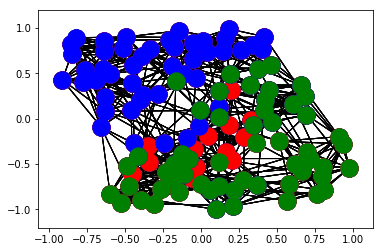

In [261]:
print(len(prS))
for i in range(len(prS)):
    clusteri = nx.Graph(G2.subgraph(prS[i]))
    nx.draw_networkx_nodes(clusteri, pos=pos,
                           node_color=colormap[i])
    nx.draw_networkx_edges(clusteri, pos=pos)